In [1]:
from google.colab import files
files.upload()


Saving Bank_marketing_data.csv to Bank_marketing_data.csv


{'Bank_marketing_data.csv': b'age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y\n58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no\n44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no\n33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no\n47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no\n33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no\n35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no\n28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no\n42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no\n58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no\n43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no\n41,admin.,divorced,secondary,no,270,yes,no,

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("Bank_marketing_data.csv")
df.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
# Check shape and types
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Count 'unknown' values
print("\nCount of 'unknown' values:")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col}: {(df[col] == 'unknown').sum()}")

# Unique values
print("\nUnique values per column:\n", df.nunique())


Shape: (45211, 17)

Data types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Count of 'unknown' values:
job: 288
marital: 0
education: 1857
default: 0
housing: 0
loan: 0
contact: 13020
month: 0
poutcome: 36959
y: 0

Unique values per column:
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         

In [4]:
# Replace 'unknown' with actual NaN
df.replace("unknown", np.nan, inplace=True)

# Convert important numeric columns
df["balance"] = pd.to_numeric(df["balance"], errors="coerce")
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")
df["day"] = pd.to_numeric(df["day"], errors="coerce")

# Drop all rows with any missing value
df_cleaned = df.dropna()

# Drop rows with 0 balance or duration
df_cleaned = df_cleaned[(df_cleaned["balance"] > 0) & (df_cleaned["duration"] > 0)]

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# View cleaned result
print("Cleaned dataset shape:", df_cleaned.shape)
df_cleaned.head()


Cleaned dataset shape: (6939, 17)


age          job  marital  education default  balance housing loan  \
0   33       admin.  married   tertiary      no      882      no   no   
1   33     services  married  secondary      no     3444     yes   no   
2   36   management  married   tertiary      no     2415     yes   no   
3   44  blue-collar  married  secondary      no     1324     yes   no   
4   26   technician   single   tertiary      no      172      no  yes   

     contact  day month  duration  campaign  pdays  previous poutcome    y  
0  telephone   21   oct        39         1    151         3  failure   no  
1  telephone   21   oct       144         1     91         4  failure  yes  
2  telephone   22   oct        73         1     86         4    other   no  
3  telephone   25   oct       119         1     89         2    other   no  
4  telephone    4   nov        21         1    140         4    other   no

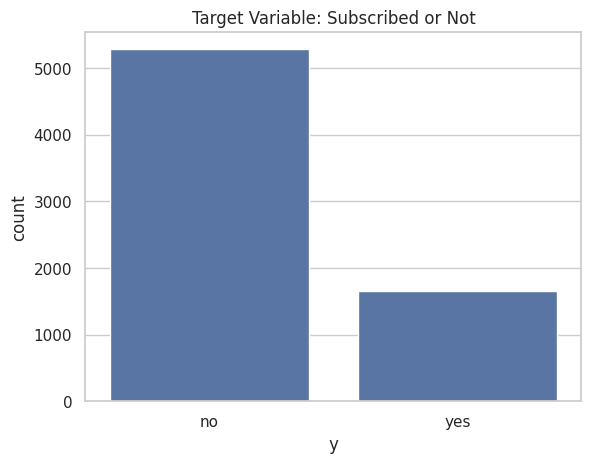

In [5]:
sns.countplot(data=df_cleaned, x='y')
plt.title("Target Variable: Subscribed or Not")
plt.show()


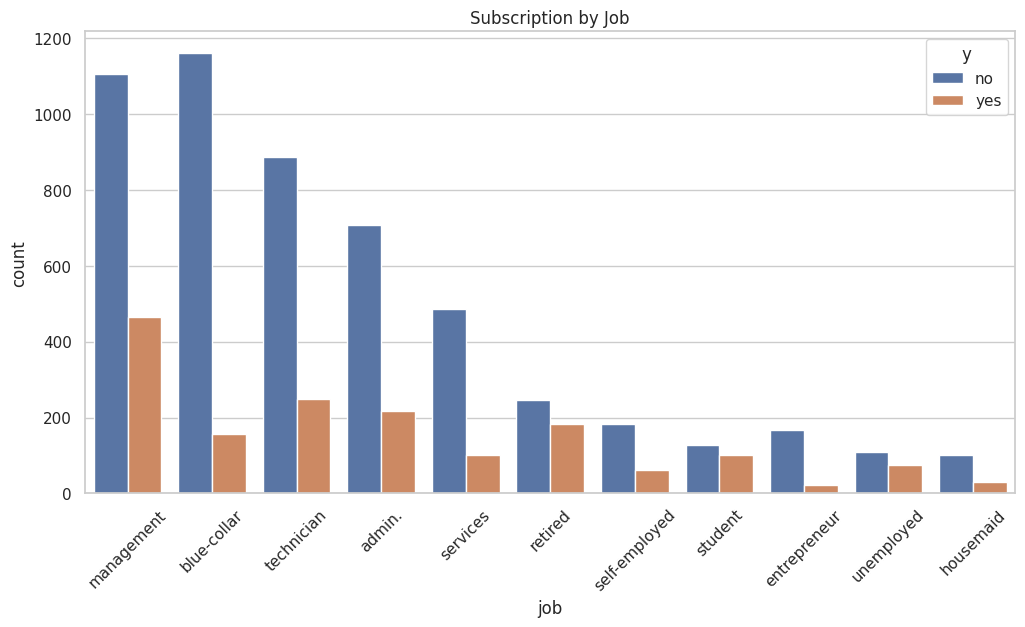

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x="job", hue="y", order=df_cleaned["job"].value_counts().index)
plt.title("Subscription by Job")
plt.xticks(rotation=45)
plt.show()


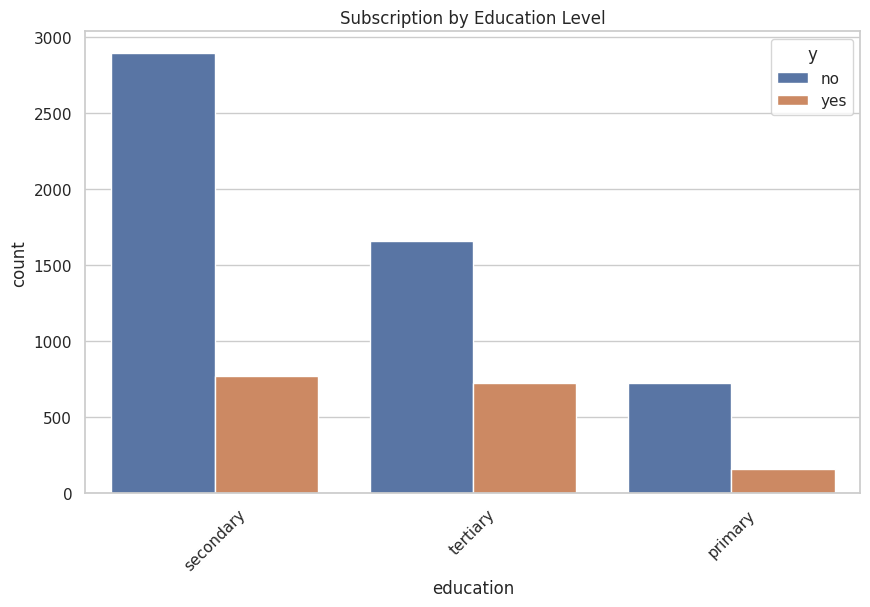

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x="education", hue="y", order=df_cleaned["education"].value_counts().index)
plt.title("Subscription by Education Level")
plt.xticks(rotation=45)
plt.show()


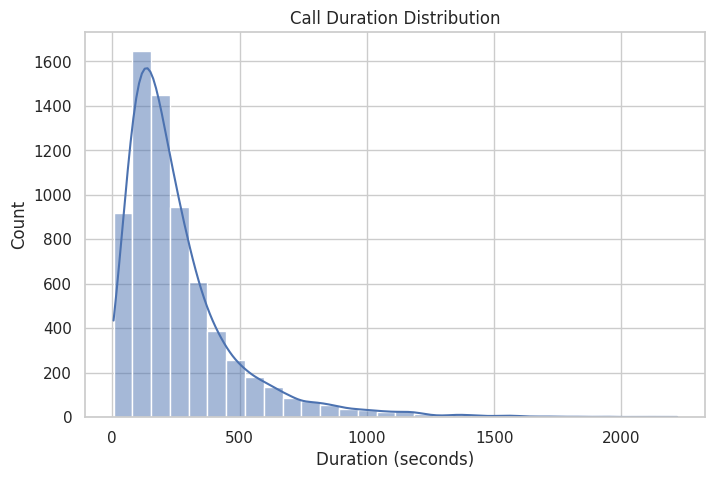

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["duration"], bins=30, kde=True)
plt.title("Call Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.show()


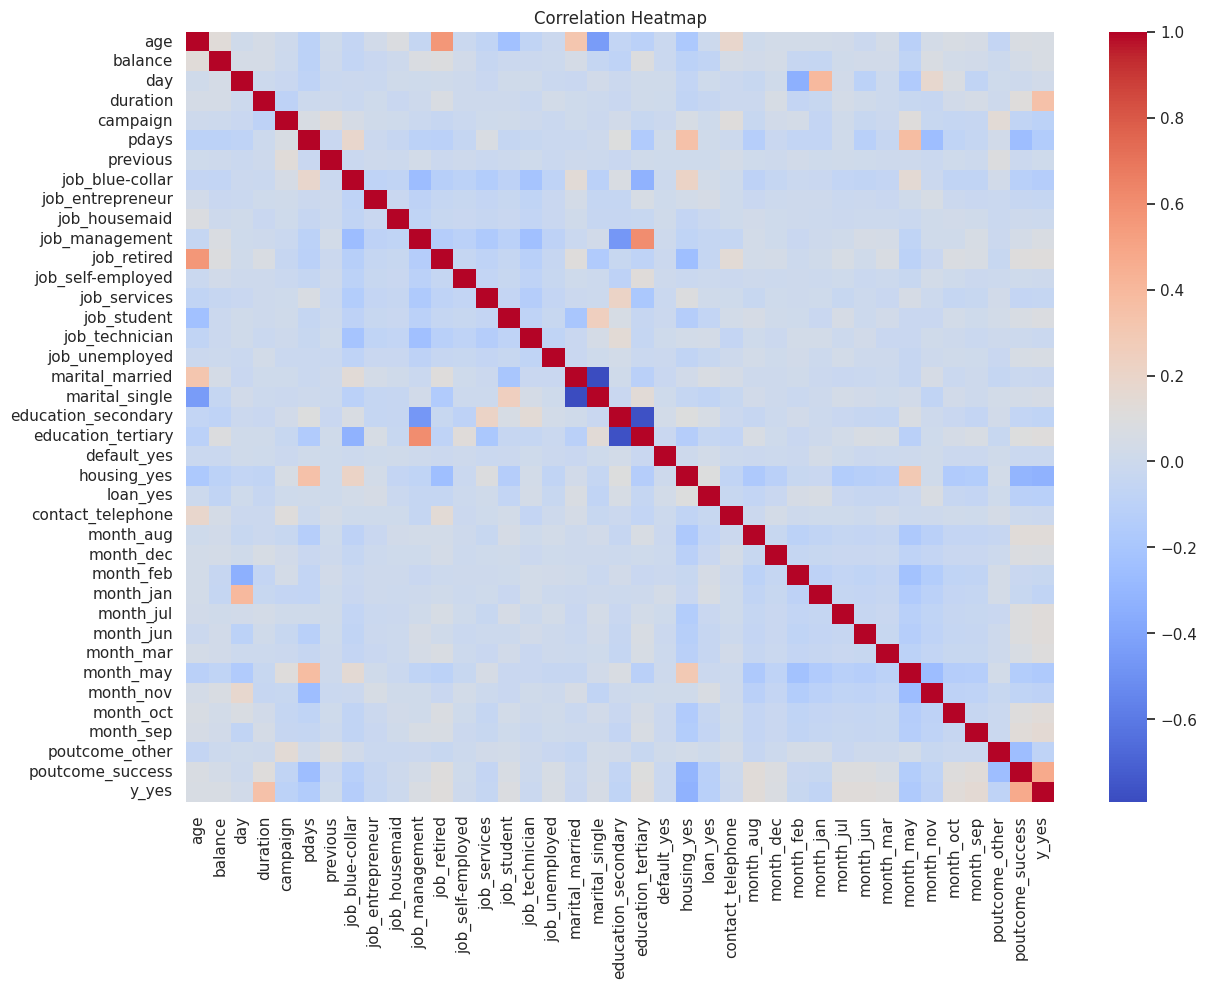

In [9]:
# Encode categorical features
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Define features (X) and target (y)
X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model with higher iterations
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8378962536023055

✅ Confusion Matrix:
 [[984  80]
 [145 179]]

✅ Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.92      0.90      1064
        True       0.69      0.55      0.61       324

    accuracy                           0.84      1388
   macro avg       0.78      0.74      0.76      1388
weighted avg       0.83      0.84      0.83      1388



In [11]:
# Save as new CSV
df_cleaned.to_csv("final_cleaned_data.csv", index=False)

# Download it
from google.colab import files
files.download("final_cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>